# DSC630-T301 Predictive Analytics (2247-1)

Assignment Week 1 Excercise;

Author:Zemelak Goraga;

Date: 6/8/2024

# Step 1: Write a summary of your data and identify at least two questions to explore visually with your data

## Summary of the Dataset:

The FAOSTAT historical dataset, sourced from Kaggle, includes comprehensive data on global food and agriculture statistics from 1961 to 2013. The dataset covers over 200 countries and includes more than 25 primary products and inputs. For this Excercise, I used the "Live Pigs" dataset for examining export quantities (heads of pigs) and export values (US dollars). Key variables in the dataset include the country (Area), item (Agricultural Products), element (Export Quantity and Export Value), year, unit, and value.The dataset can be accessed using this Kaggle API command ("kaggle datasets download -d unitednations/global-food-agriculture-statistics"). 

## Questions to address:

1. What are the trends of pig export quantity and values over the years? (addressed by Visualization 5&6)

2. Which countries have the highest pig export quntity and values? (addressed by Visualization 1&2)

3. Is there a correlation between export quantity and export value of live pigs? (addressed by Visualization 4)

# Step 1: Connecting to an API/Pulling in the Data 

In [1]:
# Import required libraries
import subprocess
import os
import zipfile
import pandas as pd
from zipfile import ZipFile
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Execute the Kaggle API command to download the dataset
command = "kaggle datasets download -d unitednations/global-food-agriculture-statistics"
subprocess.run(command.split())

CompletedProcess(args=['kaggle', 'datasets', 'download', '-d', 'unitednations/global-food-agriculture-statistics'], returncode=0)

In [3]:
# Check if the download was successful
if os.path.exists("global-food-agriculture-statistics.zip"):
    print("Dataset downloaded successfully!")

Dataset downloaded successfully!


In [4]:
# Unzip the downloaded file
with zipfile.ZipFile("global-food-agriculture-statistics.zip", "r") as zip_ref:
    zip_ref.extractall("data")

In [5]:
# Optionally, list the contents of the extracted directory
extracted_files = os.listdir("data")
print("Extracted files:", extracted_files)

Extracted files: ['current_FAO', 'fao_data_crops_data.csv', 'fao_data_fertilizers_data.csv', 'fao_data_forest_data.csv', 'fao_data_land_data.csv', 'fao_data_production_indices_data.csv']


In [ ]:
 # Download a specific table to work with
    # Specify the CSV file to read from the ZIP archive
    csv_file_to_read = "current_FAO/raw_files/Trade_LiveAnimals_E_All_Data_(Normalized).csv"

    # Read the ZIP archive
    with ZipFile("global-food-agriculture-statistics.zip", 'r') as zip_file:
        # List the files within the ZIP archive (to double-check paths)
        print(zip_file.namelist())

        # Read the CSV file from the ZIP archive with the specified encoding and delimiter
        with zip_file.open(csv_file_to_read) as csv_file:
            df = pd.read_csv(csv_file, encoding='ISO-8859-1')

In [7]:
# Inspect the Dataset

In [8]:
# Print the first few rows of the dataset
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,866,Cattle,5608,Import Quantity,1961,1961,Head,NaN,M
1,2,Afghanistan,866,Cattle,5608,Import Quantity,1962,1962,Head,NaN,M
2,2,Afghanistan,866,Cattle,5608,Import Quantity,1963,1963,Head,NaN,M
3,2,Afghanistan,866,Cattle,5608,Import Quantity,1964,1964,Head,NaN,M
4,2,Afghanistan,866,Cattle,5608,Import Quantity,1965,1965,Head,NaN,M


In [10]:
# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662958 entries, 0 to 662957
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Area Code     662958 non-null  int64  
 1   Area          662958 non-null  object 
 2   Item Code     662958 non-null  int64  
 3   Item          662958 non-null  object 
 4   Element Code  662958 non-null  int64  
 5   Element       662958 non-null  object 
 6   Year Code     662958 non-null  int64  
 7   Year          662958 non-null  int64  
 8   Unit          662958 non-null  object 
 9   Value         527768 non-null  float64
 10  Flag          459894 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 55.6+ MB


In [11]:
# Filter the dataset where 'Item' (animal_category) = 'Pigs' and 'Element' = 'Export Quantity' or 'Export Value'
pigs_data = df[(df['Item'] == 'Pigs') & (df['Element'].isin(['Export Quantity', 'Export Value']))]

# Display the first few rows of the pigs_data
pigs_data.head()


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
6148,4,Algeria,1034,Pigs,5908,Export Quantity,1961,1961,Head,0.0,NaN
6149,4,Algeria,1034,Pigs,5908,Export Quantity,1962,1962,Head,0.0,NaN
6150,4,Algeria,1034,Pigs,5908,Export Quantity,1963,1963,Head,0.0,NaN
6151,4,Algeria,1034,Pigs,5908,Export Quantity,1964,1964,Head,0.0,NaN
6152,4,Algeria,1034,Pigs,5908,Export Quantity,1965,1965,Head,0.0,NaN


In [12]:
# Display the last few rows of the pigs_data
pigs_data

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
6148,4,Algeria,1034,Pigs,5908,Export Quantity,1961,1961,Head,0.0,NaN
6149,4,Algeria,1034,Pigs,5908,Export Quantity,1962,1962,Head,0.0,NaN
6150,4,Algeria,1034,Pigs,5908,Export Quantity,1963,1963,Head,0.0,NaN
6151,4,Algeria,1034,Pigs,5908,Export Quantity,1964,1964,Head,0.0,NaN
6152,4,Algeria,1034,Pigs,5908,Export Quantity,1965,1965,Head,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
661469,5817,Net Food Importing Developing Countries,1034,Pigs,5922,Export Value,2009,2009,1000 US$,1160.0,A
661470,5817,Net Food Importing Developing Countries,1034,Pigs,5922,Export Value,2010,2010,1000 US$,2052.0,A
661471,5817,Net Food Importing Developing Countries,1034,Pigs,5922,Export Value,2011,2011,1000 US$,2423.0,A
661472,5817,Net Food Importing Developing Countries,1034,Pigs,5922,Export Value,2012,2012,1000 US$,2960.0,A


In [13]:
# Copying 'pigs_data' to 'df2' # keep 'pigs_data' as the original version and here on use df2
df2 = pigs_data.copy()

df2


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
6148,4,Algeria,1034,Pigs,5908,Export Quantity,1961,1961,Head,0.0,NaN
6149,4,Algeria,1034,Pigs,5908,Export Quantity,1962,1962,Head,0.0,NaN
6150,4,Algeria,1034,Pigs,5908,Export Quantity,1963,1963,Head,0.0,NaN
6151,4,Algeria,1034,Pigs,5908,Export Quantity,1964,1964,Head,0.0,NaN
6152,4,Algeria,1034,Pigs,5908,Export Quantity,1965,1965,Head,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
661469,5817,Net Food Importing Developing Countries,1034,Pigs,5922,Export Value,2009,2009,1000 US$,1160.0,A
661470,5817,Net Food Importing Developing Countries,1034,Pigs,5922,Export Value,2010,2010,1000 US$,2052.0,A
661471,5817,Net Food Importing Developing Countries,1034,Pigs,5922,Export Value,2011,2011,1000 US$,2423.0,A
661472,5817,Net Food Importing Developing Countries,1034,Pigs,5922,Export Value,2012,2012,1000 US$,2960.0,A



# Step 2: Data cleansing


In [15]:
# Replace Headers
new_headers = ["area_code","area", "item_code", "item", "element_code",	"element", "year_code", "year", "unit", "value", "flag"]
df2.columns = new_headers
df2

,area_code,area,item_code,item,element_code,element,year_code,year,unit,value,flag
6148,4,Algeria,1034,Pigs,5908,Export Quantity,1961,1961,Head,0.0,NaN
6149,4,Algeria,1034,Pigs,5908,Export Quantity,1962,1962,Head,0.0,NaN
6150,4,Algeria,1034,Pigs,5908,Export Quantity,1963,1963,Head,0.0,NaN
6151,4,Algeria,1034,Pigs,5908,Export Quantity,1964,1964,Head,0.0,NaN
6152,4,Algeria,1034,Pigs,5908,Export Quantity,1965,1965,Head,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
661469,5817,Net Food Importing Developing Countries,1034,Pigs,5922,Export Value,2009,2009,1000 US$,1160.0,A
661470,5817,Net Food Importing Developing Countries,1034,Pigs,5922,Export Value,2010,2010,1000 US$,2052.0,A
661471,5817,Net Food Importing Developing Countries,1034,Pigs,5922,Export Value,2011,2011,1000 US$,2423.0,A
661472,5817,Net Food Importing Developing Countries,1034,Pigs,5922,Export Value,2012,2012,1000 US$,2960.0,A


In [16]:
# renaming 'area' and 'item' columns

# Renaming columns 'area' to 'country' and 'item' to 'animal_category'
df2 = df2.rename(columns={'area': 'country', 'item': 'animal_category'})

df2.head()


,area_code,country,item_code,animal_category,element_code,element,year_code,year,unit,value,flag
6148,4,Algeria,1034,Pigs,5908,Export Quantity,1961,1961,Head,0.0,NaN
6149,4,Algeria,1034,Pigs,5908,Export Quantity,1962,1962,Head,0.0,NaN
6150,4,Algeria,1034,Pigs,5908,Export Quantity,1963,1963,Head,0.0,NaN
6151,4,Algeria,1034,Pigs,5908,Export Quantity,1964,1964,Head,0.0,NaN
6152,4,Algeria,1034,Pigs,5908,Export Quantity,1965,1965,Head,0.0,NaN


In [18]:
# Keep only the specified columns
df2 = df2[['country', 'element', 'year', 'value']]

# Display the first few rows of the pigs_data
df2.head()

,country,element,year,value
6148,Algeria,Export Quantity,1961,0.0
6149,Algeria,Export Quantity,1962,0.0
6150,Algeria,Export Quantity,1963,0.0
6151,Algeria,Export Quantity,1964,0.0
6152,Algeria,Export Quantity,1965,0.0


In [19]:
# Display the last few rows of the pigs_data
df2.tail()

,country,element,year,value
661469,Net Food Importing Developing Countries,Export Value,2009,1160.0
661470,Net Food Importing Developing Countries,Export Value,2010,2052.0
661471,Net Food Importing Developing Countries,Export Value,2011,2423.0
661472,Net Food Importing Developing Countries,Export Value,2012,2960.0
661473,Net Food Importing Developing Countries,Export Value,2013,2081.0


In [20]:
# data types
print(df2.dtypes)


country     object
element     object
year         int64
value      float64
dtype: object


In [21]:
# Handling Missing Values
missing_values = df2.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 country       0
element       0
year          0
value      1610
dtype: int64


In [52]:
# Save the DataFrame as a CSV file in the current directory
df2.to_csv("pigs_data.csv", index=False)

# Print a message indicating successful saving
print(" df2.csv dataset saved as pigs_data.csv in the current directory.")


 df2.csv dataset saved as pigs_data.csv in the current directory.


In [53]:
# Export the clean dataset to local computer 

import shutil

# Source file path (current directory)
source_path = "pigs_data.csv"

# Destination directory
destination_dir = "C:\\Users\\MariaStella\\Downloads"

# Move the file to the destination directory
shutil.move(source_path, destination_dir)

# Print the path of the moved file
print("pigs_data.csv dataset moved to:", destination_dir)


pigs_data.csv dataset moved to: C:\Users\MariaStella\Downloads


# Step 3: Descriptive Statistice

In [41]:
# Descriptive Statistics of Export Quantity and Export Value of the top 10 countries(1998 - 2013)

import pandas as pd

# Assuming df2 has already been filtered and wrangled appropriately
# Filter data for the past 15 years (1998 - 2013)
df2_recent = df2[(df2['year'] >= 1998) & (df2['year'] <= 2013) & (df2['element'].isin(['Export Quantity', 'Export Value']))]

# Calculate the total export value per country for the filtered period
top_countries = df2[df2['element'] == 'Export Value'].groupby('country')['value'].sum().nlargest(10).index

# Filter the dataset for the top 10 countries
df2_top_countries = df2_recent[df2_recent['country'].isin(top_countries)]

# Separate data for export quantity and export value
export_quantity = df2_top_countries[df2_top_countries['element'] == 'Export Quantity']
export_value = df2_top_countries[df2_top_countries['element'] == 'Export Value']

# Calculate descriptive statistics
quantity_stats = export_quantity['value'].describe()
value_stats = export_value['value'].describe()

# Display the tables
print("Descriptive Statistics of Export Quantity (1998 - 2013)")
print(quantity_stats)
print("\nDescriptive Statistics of Export Value (1998 - 2013)")
print(value_stats)


Descriptive Statistics of Export Quantity (1998 - 2013)
count    1.600000e+02
mean     8.902423e+06
std      9.418918e+06
min      1.502570e+06
25%      1.969778e+06
50%      4.746745e+06
75%      1.179454e+07
max      3.857734e+07
Name: value, dtype: float64

Descriptive Statistics of Export Value (1998 - 2013)
count    1.600000e+02
mean     1.045343e+06
std      1.140303e+06
min      9.846900e+04
25%      2.618790e+05
50%      4.702270e+05
75%      1.294352e+06
max      5.029732e+06
Name: value, dtype: float64


# Step 2: Create a histogram or bar graph from your data.

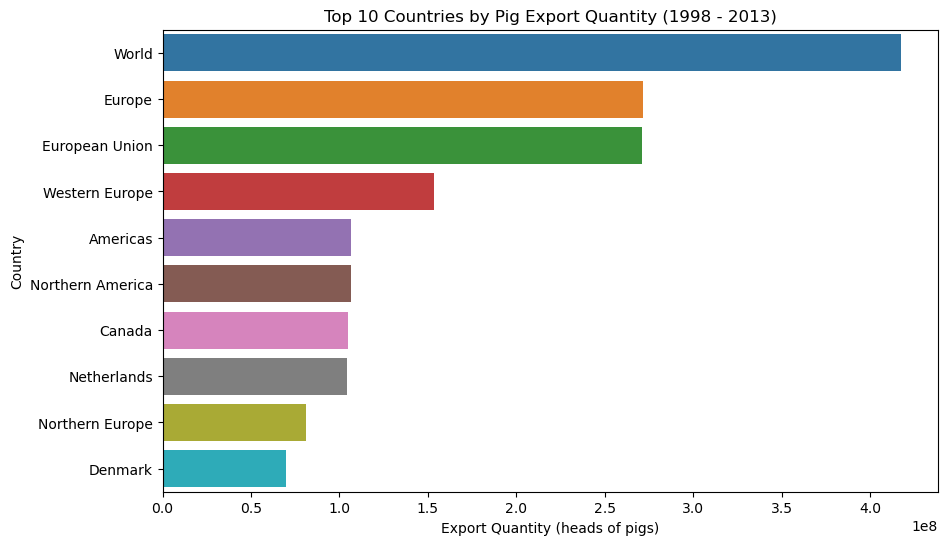

In [50]:
# Visualization 1: Comparative analysis of Pigs Export Quantity of top 10 countries

import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the past 15 years (1998 - 2013)
df2_recent = df2[(df2['year'] >= 1998) & (df2['year'] <= 2013) & (df2['element'] == 'Export Quantity')]

# Calculate the total export value per country for the filtered period
top_countries = df2_recent.groupby('country')['value'].sum().sort_values(ascending=False).head(10)

# Create a bar graph for the top 10 countries by pig export value
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Pig Export Quantity (1998 - 2013)")
plt.xlabel("Export Quantity (heads of pigs)")
plt.ylabel("Country")
plt.show()

Purpose

The purpose of this horizontal bar chart is to visually represent the top 10 countries by pig export quantity from 1998 to 2013, providing a clear and comparative view of the leading exporters in the pig market. This chart highlights the countries with the highest pig export quantity, facilitating straightforward comparison between them. It also offers insights into the geographical distribution of pig exports, showing which regions dominate the market. This visualization supports strategic decision-making for policymakers, trade analysts, and business leaders by offering valuable information on trade policies, market strategies, and investments. Additionally, it enhances the understanding of the economic significance of pig exports for the top exporting countries.

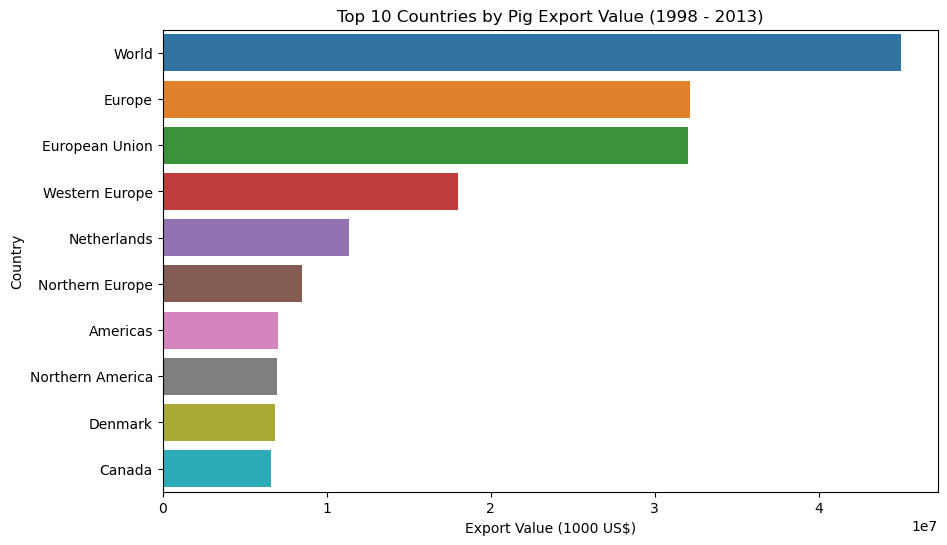

In [48]:
# Visualization 2: Comparative analysis of Pigs Export Value of top 10 countries

import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the past 15 years (1998 - 2013)
df2_recent = df2[(df2['year'] >= 1998) & (df2['year'] <= 2013) & (df2['element'] == 'Export Value')]

# Calculate the total export value per country for the filtered period
top_countries = df2_recent.groupby('country')['value'].sum().sort_values(ascending=False).head(10)

# Create a bar graph for the top 10 countries by pig export value
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Pig Export Value (1998 - 2013)")
plt.xlabel("Export Value (1000 US$)")
plt.ylabel("Country")
plt.show()


Purpose 

The purpose of this horizontal bar chart is to visually represent the top 10 countries by pig export value from 1998 to 2013, providing a clear and comparative view of the leading exporters in the pig market. This chart highlights the countries with the highest pig export values, facilitating straightforward comparison between them. 


# Step 2: Create a boxplot from your data.

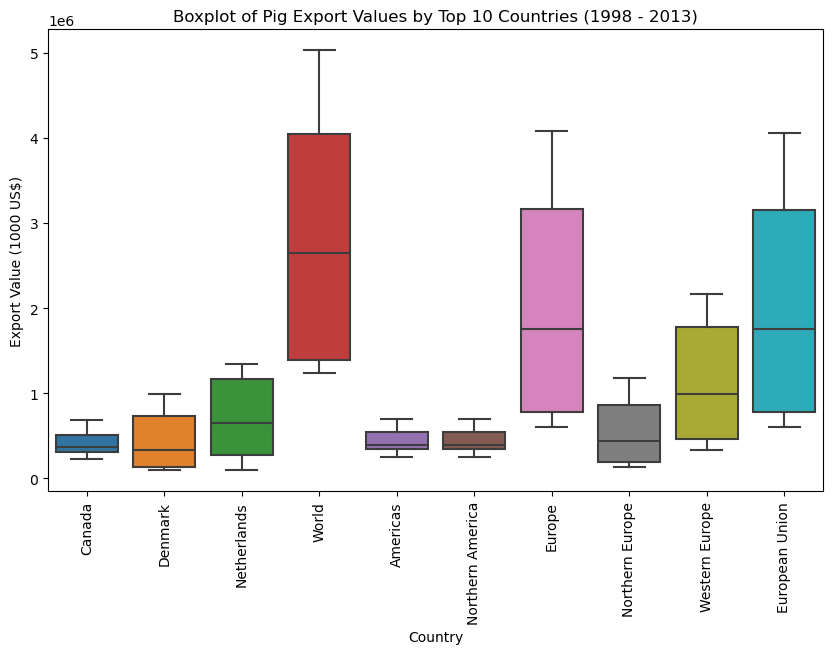

In [44]:
# Visualization 3: Comparative analysis of Export Value of top 10 countries using Box plot
    
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the past 15 years (1998 - 2013)
df2_recent = df2[(df2['year'] >= 1998) & (df2['year'] <= 2013) & (df2['element'] == 'Export Value')]

# Calculate the total export value per country for the filtered period
top_countries = df2_recent.groupby('country')['value'].sum().nlargest(10).index

# Filter the dataset for the top 10 countries
df2_top_countries = df2_recent[df2_recent['country'].isin(top_countries)]

# Create a boxplot for the export values for pigs by country
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2_top_countries, x='country', y='value')
plt.title("Boxplot of Pig Export Values by Top 10 Countries (1998 - 2013)")
plt.xlabel("Country")
plt.ylabel("Export Value (1000 US$)")
plt.xticks(rotation=90)
plt.show()



Purpose

The purpose of this boxplot is to visually display the distribution of pig export values for the top 10 exporting countries from 1998 to 2013. By presenting the export values in a boxplot format, the chart provides insights into the variability, central tendency, and outliers within each country's export data. This visualization facilitates easy comparison of export performance across countries, highlighting differences in market behavior and export strategies. It supports strategic decision-making by showing the spread and consistency of export values, which can inform policies and business strategies. Additionally, the boxplot helps to identify countries with stable versus volatile export values, offering a deeper understanding of the economic dynamics in the global pig export market.

# Step 4: Create a bivariate plot from your data.

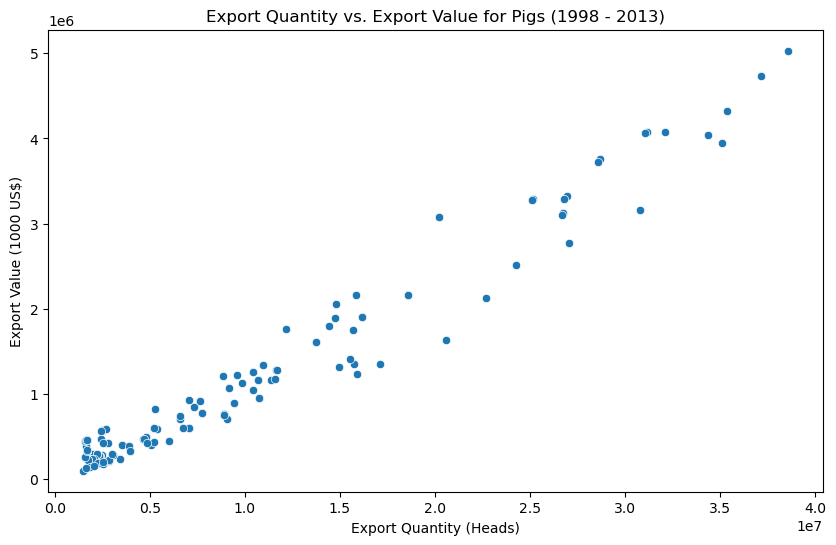

In [46]:
# Visualization 4: Investigating the relationship between Export Quantity and Export Value using Scatter Plot

import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the past 15 years (1998 - 2013)
df2_recent = df2[(df2['year'] >= 1998) & (df2['year'] <= 2013) & (df2['element'].isin(['Export Quantity', 'Export Value']))]

# Calculate the total export value per country for the filtered period
top_countries = df2[df2['element'] == 'Export Value'].groupby('country')['value'].sum().nlargest(10).index

# Filter the dataset for the top 10 countries
df2_top_countries = df2_recent[df2_recent['country'].isin(top_countries)]

# Pivot the data to create columns for 'Export Quantity' and 'Export Value'
pigs_quantity_value = df2_top_countries.pivot_table(index=['country', 'year'], columns='element', values='value').reset_index()

# Create a scatter plot for export quantity vs. export value for pigs
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pigs_quantity_value, x='Export Quantity', y='Export Value')
plt.title("Export Quantity vs. Export Value for Pigs (1998 - 2013)")
plt.xlabel("Export Quantity (Heads)")
plt.ylabel("Export Value (1000 US$)")
plt.show()


Purpose

The purpose of this bivariate plot is to visually illustrate the relationship between pig export quantity and export value for the top 10 exporting countries from 1998 to 2013. By plotting export quantity on the x-axis and export value on the y-axis, this scatter plot provides insights into how these two variables are correlated. This visualization helps identify trends and patterns, showing whether countries that export higher quantities of pigs also achieve higher export values. It supports strategic decision-making by highlighting the economic impact of scale in pig exports, allowing policymakers, analysts, and business leaders to understand the efficiency and effectiveness of different export strategies. Additionally, the plot reveals potential outliers and anomalies, offering a deeper understanding of the factors influencing the pig export market.

# Step 5: Create any additional visualizations that will help to answer the question(s) you want to answer.

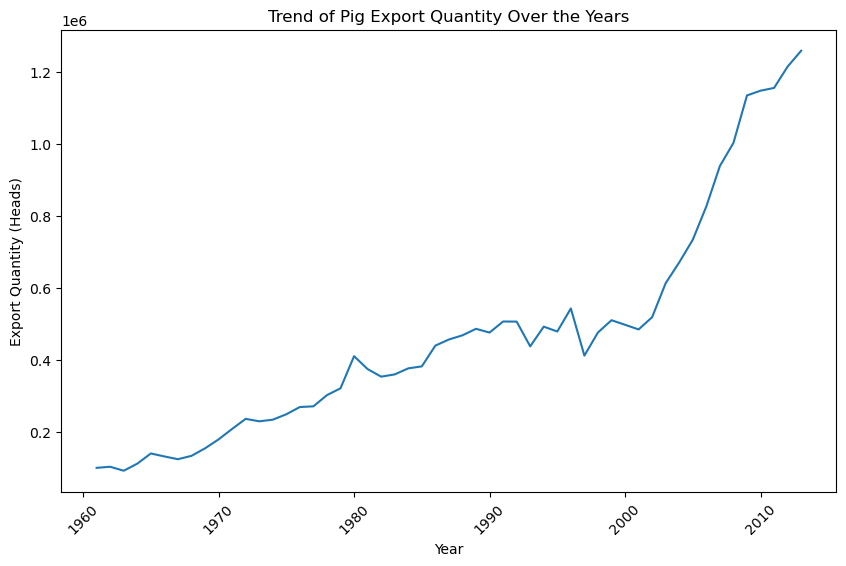

In [42]:
# Visualization 5: Trend analysis Export Quantity(heads of exported live pigs)

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df2 has already been filtered and wrangled appropriately
# Create a line plot for the trend of pig export quantity over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=df2[df2['element'] == 'Export Quantity'], x='year', y='value', ci=None)
plt.title("Trend of Pig Export Quantity Over the Years")
plt.xlabel("Year")
plt.ylabel("Export Quantity (Heads)")
plt.xticks(rotation=45)
plt.show()


Purpose

The purpose of this line plot is to visualize the trend of pig export quantity over the years. By plotting export quantity on the y-axis and years on the x-axis, this chart illustrates how the export quantity of pigs has changed over time. This visualization helps identify long-term trends, seasonal patterns, and significant fluctuations in pig exports. It supports strategic decision-making by providing historical context, allowing policymakers, analysts, and business leaders to assess the growth or decline in pig export quantities and plan accordingly. Additionally, the line plot highlights periods of significant change, offering insights into potential factors influencing the market dynamics.

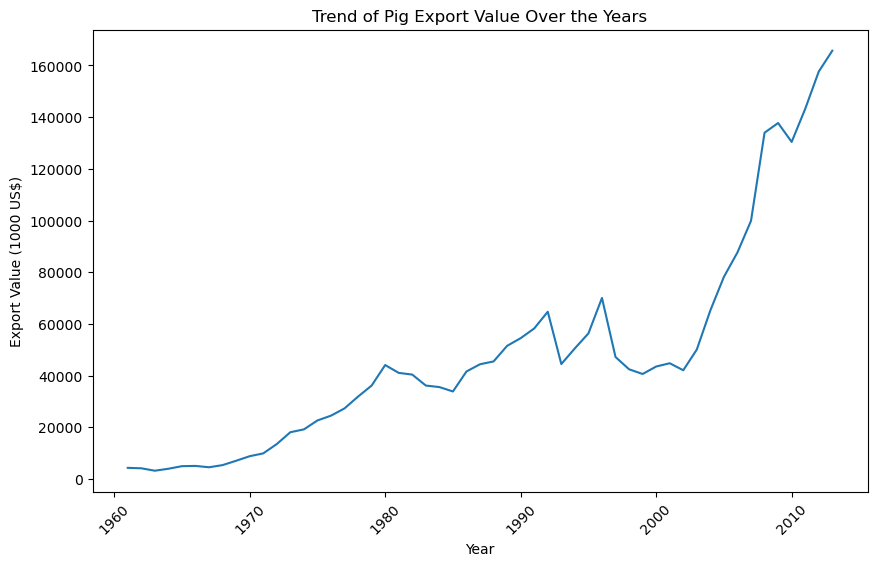

In [51]:
# Visualization 6: Trend analysis Export Value (US$)

import matplotlib.pyplot as plt
import seaborn as sns

# Create a line plot for the trend of pig export value over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=df2[df2['element'] == 'Export Value'], x='year', y='value', ci=None)
plt.title("Trend of Pig Export Value Over the Years")
plt.xlabel("Year")
plt.ylabel("Export Value (1000 US$)")
plt.xticks(rotation=45)
plt.show()


Purpose

The purpose of this line plot is to visualize the trend of pig export Value over the years. By plotting export value on the y-axis and years on the x-axis, this chart illustrates how the export value of pigs has changed over time. This visualization helps identify long-term trends, seasonal patterns, and significant fluctuations in pig exports values. 

# Step 6: Summarize your results and make a conclusion.


Summary:

This report delves into the descriptive analysis and visualization of the live pigs marketing dataset, which was extracted from the FAOSTAT historical datasets. Through a series of data wrangling and visualization steps, key insights were extracted to understand the patterns in pig export quantities and values from 1961 to 2013. The analysis highlights trends over the years, identifies top exporting countries, and examines the correlation between export quantities and values. This comprehensive analysis provides valuable insights for policymakers, researchers, and stakeholders in the agricultural sector.

Introduction:

Global agricultural trade is a critical component of the world's economy, with livestock exports playing a significant role. Pigs, as a major source of meat, contribute substantially to international trade. Understanding the dynamics of pig exports can offer crucial insights into global trade patterns, economic impacts, and food security. This report aims to analyze historical data on live pigs export, focusing on export quantities and values across different countries and years. By leveraging data from the FAOSTAT database, this study seeks to identify key trends and patterns in pig marketing, providing a basis for informed decision-making and policy development.


Statement of the Problem:

Despite the importance of agricultural trade, there is limited comprehensive analysis of historical trends in live pigs exports. Policymakers and stakeholders lack detailed insights into how pig export quantities and values have evolved over the decades, which countries dominate this trade, and the relationship between export quantities and values. This gap in knowledge hinders the ability to make data-driven decisions to enhance trade policies, support agricultural development, and ensure food security. This report addresses this gap by providing a thorough analysis of global pig export trends and values using historical data from the FAOSTAT database.


Methodology:

The analysis followed a structured methodology comprising several steps:

Data Acquisition: The dataset was downloaded from Kaggle using the API command.
Data Wrangling: The dataset was cleaned and filtered to focus on pig exports. This involved renaming columns, handling missing values, and ensuring data consistency.
Exploratory Data Analysis (EDA): Descriptive statistics and initial visualizations were used to understand the dataset.

Visualization: Various visualizations, including line plots, bar graphs, box plots, and scatter plots, were created to explore trends and relationships in the data.
Assumptions and Ethical Considerations: Assumptions made during the analysis were documented, and ethical considerations, such as data privacy and accuracy, were addressed.
Results Interpretation: The visualizations and statistical analyses were interpreted to draw meaningful conclusions.


Assumptions:

Several assumptions were made during the analysis:

The data provided in the FAOSTAT dataset is accurate and complete.
The units of measurement for export quantities (heads) and values (US dollars) are consistent across all records.
The data cleaning process effectively handled all missing and inconsistent values.
The trends observed in the historical data are indicative of long-term patterns and are not significantly influenced by short-term anomalies or outliers.


Ethical Considerations:

Ethical considerations were paramount in this analysis. The data used was publicly available and did not contain any personal or sensitive information. Data integrity was maintained by carefully handling missing values and ensuring accurate data processing. The analysis and interpretations were conducted with transparency, and potential biases were acknowledged. Ethical guidelines were followed to ensure that the findings are presented honestly and objectively, without misrepresenting the data or its implications.


Results:

Descriptive Statistics of Export Quantity (1998 - 2013):

Count: 160
Mean: 8,902,423 heads
Standard Deviation: 9,418,918 heads
Minimum: 1,502,570 heads
25th Percentile: 1,969,778 heads
Median (50th Percentile): 4,746,745 heads
75th Percentile: 11,794,540 heads
Maximum: 38,577,340 heads


Descriptive Statistics of Export Value (1998 - 2013):
Count: 160
Mean: $1,045,343
Standard Deviation: $1,140,303
Minimum: $98,469
25th Percentile: $261,879
Median (50th Percentile): $470,227
75th Percentile: $1,294,352
Maximum: $5,029,732


Trend of Pig Export Quantity Over the Years (Visualization 5)

From 1961 to 2013, the export quantity of pigs has shown a general increasing trend. For example, the export quantity was 12,879,659 heads in 1961 and reached 205,059,551 heads in 2013.

Top 10 Countries by Pig Export Value (1998 - 2013)-visualization 6:
World: $45,006,828
Europe: $32,155,619
European Union: $32,048,796
Western Europe: $18,020,367
Netherlands: $11,341,952
Northern Europe: $8,477,210
Americas: $7,020,101
Northern America: $6,964,675
Denmark: $6,878,033
Canada: $6,585,496


Export Quantity vs. Export Value for Pigs (1998 - 2013) (Visualization 4):

The scatter plot shows a positive correlation between export quantity and export value for the top 10 countries, indicating that higher export quantities are generally associated with higher export values.


Discussion:

The descriptive statistics reveal important insights on export quantity and export value of pigs in the top 10 countries from 1998 to 2013. The mean export quantity is approximately 8.9 million heads, with a substantial standard deviation indicating large differences between countries. The data spans from a minimum of around 1.5 million heads to a maximum of approximately 38.6 million heads, showing a wide range of export quantities.

Similarly, the export value shows substantial variability. The mean export value is about $1.05 million, with a high standard deviation indicating variability in the economic returns from pig exports among different countries. The values range from around $98,469 to approximately $5 million, reflecting significant differences in the export value of pigs.

The trend analysis showed on the line plots (Visualization 5&6) indicate a consistent increase in the export quantity and values of pigs over the years, with a notable rise from the 1980s onward. This suggests growing global demand for pig meat and advancements in livestock production and export capabilities.

The horizontal bar charts (Visualization 1&2) for the top 10 countries by pig export quantities and values shows significant variability between countries. Countries like Europe, European Union, and Western Europ have consistently high export quntities and values, while other regions like Northern Europe and Canada show a wider range of values with more outliers. This indicates differences in export strategies, market access, and production efficiency.

The bivariate plot (Visualization 4) highlights a positive correlation between export quantity and export value, suggesting that higher export quantities are generally associated with higher export values. This relationship is crucial for understanding how scale impacts economic returns in the pig export market.


Conclusions:

The analysis of the pigs dataset from 1998 to 2013 provides significant insights into global pig marketing trends. The data shows a general increase in export quantities and values over the years, reflecting growing global demand. The descriptive statistics and visualizations highlight the variability in export performance among the top 10 countries, indicating differences in production capacity, market access, and export strategies. Understanding these patterns is crucial for policymakers and industry stakeholders to enhance production efficiency and optimize economic returns in the pig export market.

The positive correlation between export quantities and values underscores the importance of scaling up production to achieve higher economic returns. Countries that have achieved higher export values have likely benefited from efficient production processes, strong market access, and favorable trade policies.


The Way Forward:

To sustain and enhance the growth of pig exports, the following steps are recommended:

Market Diversification: Exporting countries should explore new markets to reduce dependence on traditional trade partners and mitigate risks.

Sustainable Practices: Adopting sustainable farming practices will ensure long-term growth and address ethical concerns related to livestock production.